# Data Visualization in Python

This Jupyter notebook contains examples of using the `seaborn` and `matplotlib` libraries for Python.

[For the practice problems, see this notebook.][probs]

[probs]: probs/2020-03-03/problems.ipynb

You may also find these resources helpful for future work:

- [seaborn API][sns]
- [matplotlib tutorial][plt]
- [in-depth matplotlib][plt_adv]
- [matplotlib chapter in the Python Data Science Handbook][plt_book]
- [Data Viz chapter in Principles and Techniques of Data Science][ds_book]

[sns]: https://seaborn.pydata.org/api.html
[plt]: http://www.ds100.org/sp18/assets/lectures/lec07/07-intro-matplotlib.html
[plt_adv]: http://www.ds100.org/sp18/assets/lectures/lec07/07-matplotlib_beyond_basics.html
[plt_book]: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
[ds_book]: https://www.textbook.ds100.org/ch/06/viz_intro.html

In [43]:
# First, run this cell to import libraries used for this workshop
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [44]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

## Exploring the seaborn API

Most seaborn methods have an `x` and `y` parameter you can pass column names into.

In [54]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


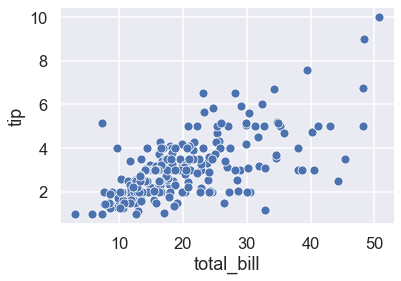

In [45]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

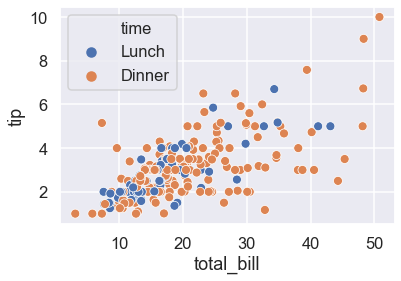

In [47]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

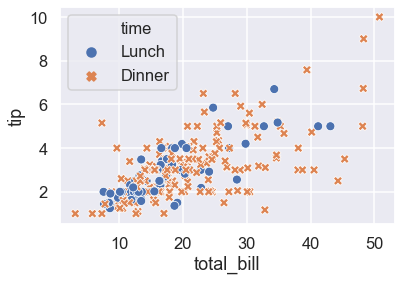

In [48]:
sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=tips)

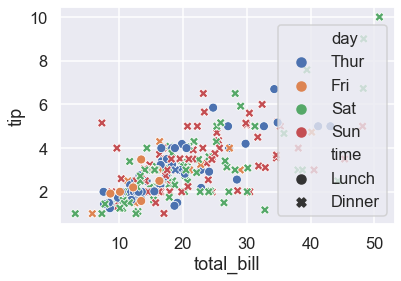

In [49]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=tips)

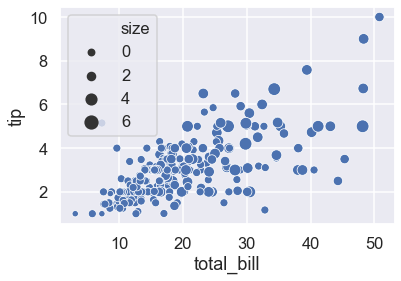

In [51]:
sns.scatterplot(x="total_bill", y="tip", size="size", data=tips)

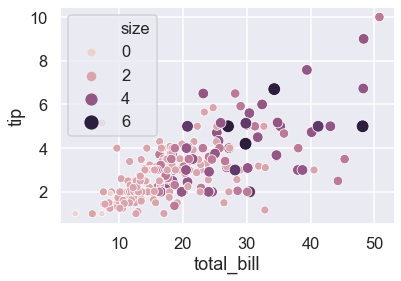

In [52]:
sns.scatterplot(x="total_bill", y="tip", hue="size", size="size", data=tips)

Other methods use the same `x` and `y` parameter:

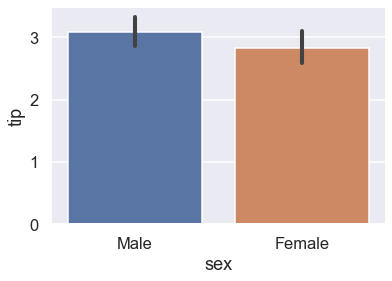

In [55]:
# Automatically makes 95% bootstrap CIs
sns.barplot(x='sex', y='tip', data=tips)

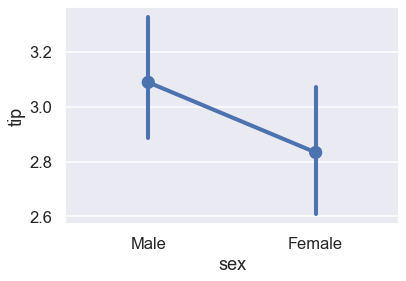

In [56]:
# Automatically makes 95% bootstrap CIs
sns.pointplot(x='sex', y='tip', data=tips)

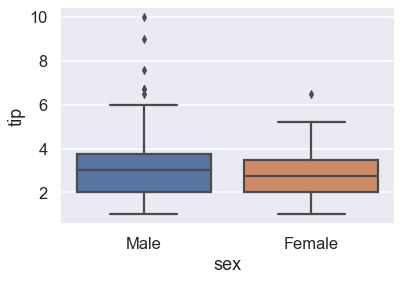

In [57]:
# Automatically makes 95% bootstrap CIs
sns.boxplot(x='sex', y='tip', data=tips)

Some methods also have a `row` and `col` parameter to make facetted plots:

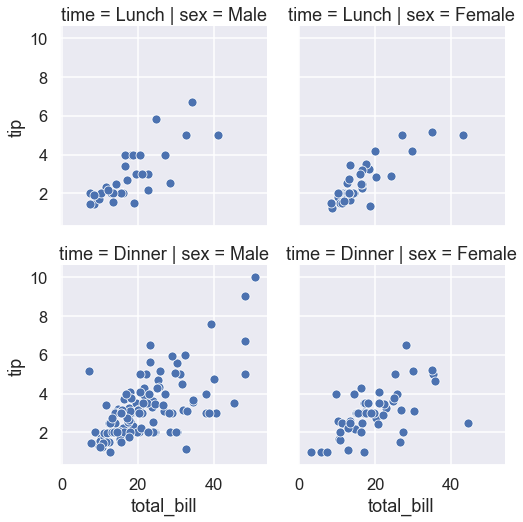

In [63]:
sns.relplot(x="total_bill", y="tip", col='sex', row='time',
            height=3.8, kind='scatter', data=tips)

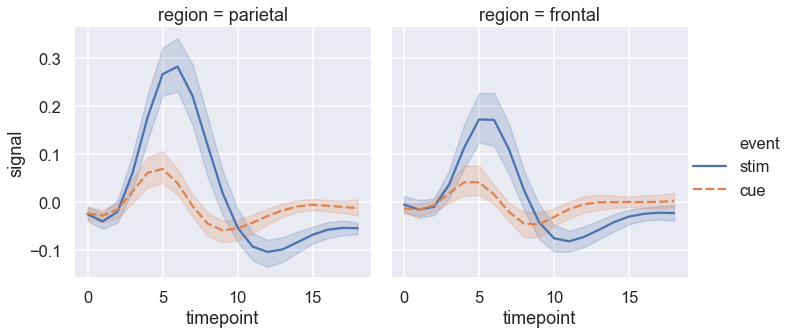

In [64]:
fmri = sns.load_dataset("fmri")
g = sns.relplot(x="timepoint", y="signal",
                hue="event", style="event", col="region",
                kind="line", data=fmri)

Distribution plots don't have `x` or `y` arguments. They take in an array of data instead:

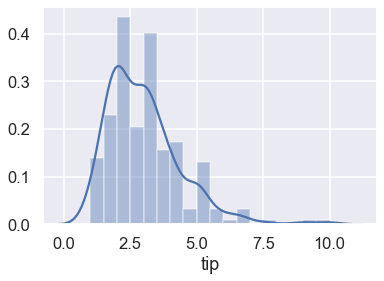

In [65]:
sns.distplot(tips['tip'])

## Customizing plots with matplotlib

`matplotlib` is the underlying library for many Python plotting libraries, including `seaborn`. All plotting methods in `seaborn` use `matplotlib` methods underneath the hood.

One common workflow is to create initial versions of plots in `seaborn` and then fine-tune them using `matplotlib`.

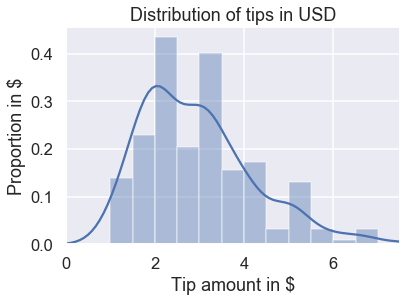

In [67]:
sns.distplot(tips['tip'])
plt.title('Distribution of tips in USD')
plt.xlabel('Tip amount in $')
plt.ylabel('Proportion in $')
plt.xlim(0, 7.5);

**Aribitrary text and LaTeX support**

In matplotlib, text can be added either relative to an individual axis object
or to the whole figure.

These commands add text to the Axes:

- title() - add a title
- xlabel() - add an axis label to the x-axis
- ylabel() - add an axis label to the y-axis
- text() - add text at an arbitrary location
- annotate() - add an annotation, with optional arrow

And these act on the whole figure:

- figtext() - add text at an arbitrary location
- suptitle() - add a title

And any text field can contain LaTeX expressions for mathematics, as long as
they are enclosed in ``$`` signs.

This example illustrates all of them:

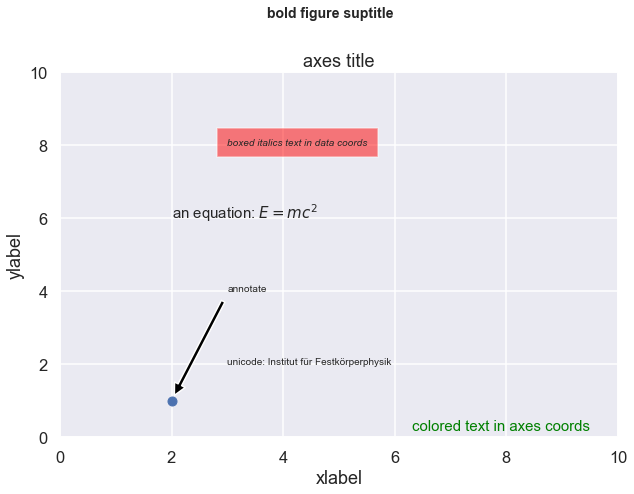

In [33]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

# This is the same as doing plt.title()
ax.set_title('axes title')

# This is the same as doing plt.xlabel()
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, 'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]);

Real life example from one of Sam's papers:

In [34]:
sam = pd.read_csv('data/sam_research.csv')
sam

,index,PID,condition,code,value
0,61,26330,control,Neuro,1.0
1,62,28234,control,Neuro,1.0
2,63,18700,control,Neuro,1.0
...,...,...,...,...,...
213,130,22381,treatment,Guessed,1.0
214,131,28567,treatment,Guessed,1.0
215,132,14173,treatment,Guessed,1.0


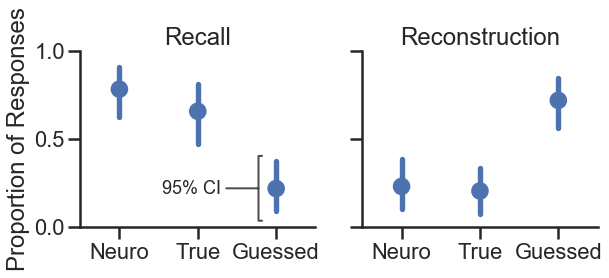

In [35]:
sns.set(style="ticks")
sns.set_context('poster')

# Set up figure
plt.figure(figsize=(9, 4))

# Make left chart
ax1 = plt.subplot(121)
sns.pointplot(x='code', y='value',
              data=sam.query('condition == "control"'),
              join=False, ax=ax1)
plt.ylabel('Proportion of Responses')
plt.title('Recall')

# Make right chart
ax2 = plt.subplot(122)
sns.pointplot(x='code', y='value',
              data=sam.query('condition == "treatment"'),
              join=False, ax=ax2)
ax2.set_ylabel('')
ax2.set_yticklabels([])
plt.title('Reconstruction')

# Adjust axis labels for both charts
ax = [ax1, ax2]
plt.setp(
    ax,
    xlabel='',
    yticks=(0, 0.5, 1),
    ylim=(0, 1),
)

# Add annotations
ax1.annotate('95% CI', xy=(1.8, 0.22), xytext=(1.3, 0.22),
             size=18, ha='right', va='center',
             arrowprops=dict(arrowstyle='-[,widthB=1.8', ec=(0.3, 0.3, 0.3)))

# Fine-tuning
sns.despine()
plt.tight_layout()
plt.subplots_adjust(wspace=.2)